In [1]:
from FedAvg_utils.data_utils import DatasetFLBEiTPretrain, DatasetFLBEiT
import torch
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt
from skimage.transform import resize

In [2]:
class Args:
    
    model_name = 'beit'
    # data_set = 'Retina'
    # data_set = 'COVIDfl'
    data_set = 'ISIC'
    input_size = 224
    window_size = (224 // 16, 224 //16)
    second_input_size = 112
    train_interpolation='bicubic'
    second_interpolation='lanczos'
    num_mask_patches=75
    max_mask_patches_per_block=None
    min_mask_patches_per_block=16
    split_type='central' 
    # single_client='train.csv' 
    single_client='train.csv' 
    discrete_vae_type = "dall-e"
    # data_path = '/data/yan/SSL-FL/Retina/'
    # data_path = '/data/yan/SSL-FL/COVIDfl/'
    data_path = '/data/yan/SSL-FL/ISIC/'

args=Args()

In [3]:
dataset_train = DatasetFLBEiT(args, phase='train')
sampler_train = torch.utils.data.RandomSampler(dataset_train)

data_loader_train = torch.utils.data.DataLoader(
    dataset_train, sampler=sampler_train,
    batch_size=1,
    num_workers=1,
    pin_memory=True,
    drop_last=True,
)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


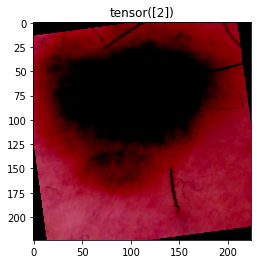

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


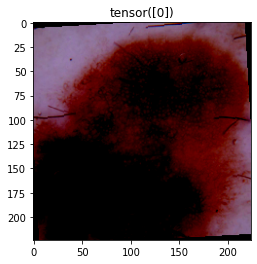

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


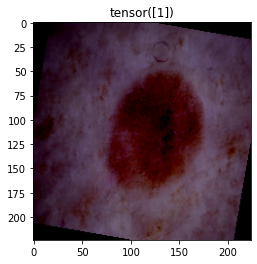

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


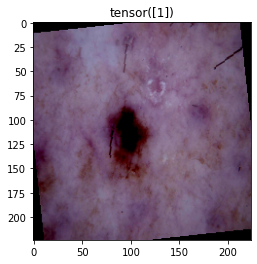

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


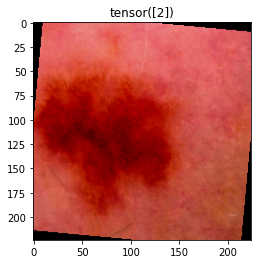

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


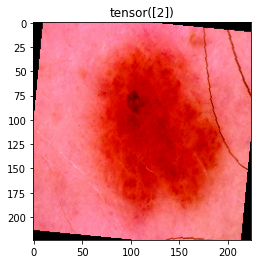

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


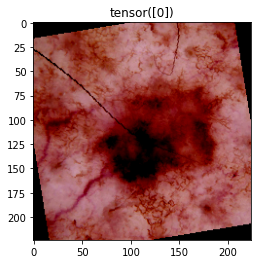

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


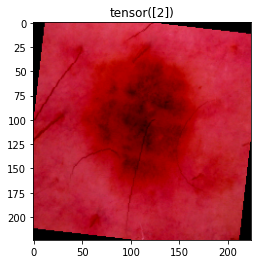

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


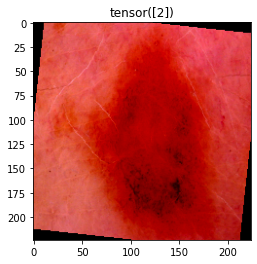

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


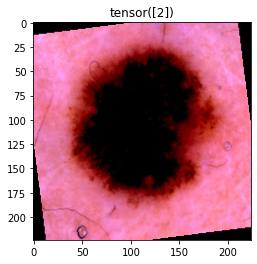

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


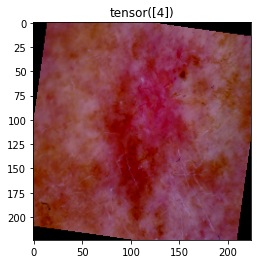

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


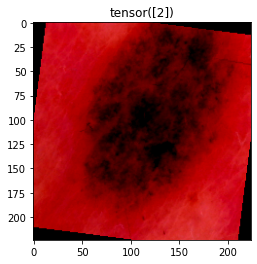

In [4]:
# for i, (batch,_) in enumerate(data_loader_train):
#     sample, img, _ = batch
#     plt.imshow(sample[0].permute(1,2,0))
#     plt.show()
    
#     if i > 10:
#         break

for i, batch, in enumerate(data_loader_train):
    img, target = batch
    plt.imshow(img[0].permute(1,2,0))
    plt.title(target)
    plt.show()
    
    if i > 10:
        break
    

In [ ]:
index = 8

if args.data_set == 'CIFAR10':
    data_all = np.load(os.path.join('./data/', args.data_set + '.npy'), allow_pickle = True)
    data_all = data_all.item()
    data_all = data_all[args.split_type]            
    data = data_all['data'][args.single_client]
    labels = data_all['target'][args.single_client]

    img = data[index]
    target = labels[index]
    
if args.data_set == 'Retina' or args.data_set == 'COVIDx':
    cur_clint_path = os.path.join(args.data_path, args.split_type, args.single_client)
    img_paths = list({line.strip().split(',')[0] for line in open(cur_clint_path)})
    labels = {line.strip().split(',')[0]: float(line.strip().split(',')[1]) for line in
                  open(os.path.join(args.data_path, 'labels.csv'))}
    
    index = index % len(img_paths)
    print(len(img_paths))
    path = os.path.join(args.data_path, 'train', img_paths[index])
    
    name = img_paths[index]
    target = labels[name]
    
    # path = '/raid/yan/COVIDx/train/sub-S03191_ses-E06595_run-1_bp-chest_vp-pa_dx-corrected.png'
    # target = labels['sub-S03191_ses-E06595_run-1_bp-chest_vp-pa_dx-corrected.png']
    
    target = np.asarray(target).astype('int64')
    
    if args.data_set == 'Retina':
        img = np.load(path)
        img = resize(img, (320, 320))
        
    else:
        img = np.array(Image.open(path))
        plt.imshow(img)
        # img = np.transpose(img,(2,0,1))
        img = process_covidx_image(img, size=480, top_percent=0.15)
    
    print(np.max(img), np.min(img))
    if img.ndim < 3:
        img = np.stack((img,)*3, axis=-1)
    elif img.shape[2] >= 3:
        img = img[:,:,:3]
    
img = Image.fromarray(np.uint8(img))

In [ ]:
np.max(img)

In [ ]:
transform = DataAugmentationForBEiT(args, no_transform=True)
# transform = build_transform(True, args)
sample = transform(img)
# mask = sample[2]

# plt.imshow(sample.permute(1,2,0))
fig, axes = plt.subplots(1, 2)
for i in range(2): 
    axes[i].imshow(sample[i].permute(1,2,0))

plt.show()

In [ ]:
sample.shape

In [ ]:
torch.min(sample[0])

In [ ]:
sample.shape